Initialise, set the path and import librarys

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import os
currPth = os.getcwd()
print(currPth)
import sys
sys.path.append("//home/ubuntu/fastai/") # go to parent dir

/home/ubuntu/fastai/courses/data/EnergyPriceDLModel


    (For some reason I have to tell FastAI where the parent dir is)

Import everything needed

In [3]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.dataset import *
from fastai.dataset import *
from fastai.plots import *

from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)

from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import LabelEncoder, Imputer, StandardScaler

from IPython.display import HTML

In [4]:
PATH="//home/ubuntu/fastai/courses/data/EnergyPriceDLModel/"

Set the Training & Testing data sets, import them from csv, parse the Date Column, have a look at it

In [5]:
data_Train = pd.read_csv(f'{PATH}Train_MAV.csv', parse_dates=['Date'])
data_Train.head(20)

,Index,Date,Time,TimeOfDay,Demand,Price
0,100,2000-01-13,11:30,Midday,4588.011733,25.8125
1,101,2000-01-13,14:30,Afternoon,4607.763383,25.9639
2,102,2000-01-13,17:30,Evening,4627.342650,26.1130
3,103,2000-01-13,20:30,Night,4640.820350,26.2637
4,104,2000-01-13,23:30,Midnight,4647.417317,26.4098
5,105,2000-01-14,2:30,Midnight,4643.340083,26.3998
6,106,2000-01-14,5:30,Early Morning,4638.365717,26.3665
7,107,2000-01-14,8:30,Morning,4646.821300,26.4696
8,108,2000-01-14,11:30,Midday,4658.210367,26.5726
9,109,2000-01-14,14:30,Afternoon,4676.877750,26.7137


In [6]:
data_Test = pd.read_csv(f'{PATH}Test_MAV.csv', parse_dates=['Date'])
data_Test.head(20)

,Index,Date,Time,TimeOfDay,Demand
0,1,2018-01-04,2:30,Midnight,6493.523130
1,2,2018-01-04,5:30,Early Morning,6484.545044
2,3,2018-01-04,8:30,Morning,6475.282030
3,4,2018-01-04,11:30,Midday,6468.830008
4,5,2018-01-04,14:30,Afternoon,6463.072207
5,6,2018-01-04,17:30,Evening,6460.175281
6,7,2018-01-04,20:30,Night,6465.149589
7,8,2018-01-04,23:30,Midnight,6468.954544
8,9,2018-02-04,2:30,Midnight,6466.320996
9,10,2018-02-04,5:30,Early Morning,6456.410457


Check lengths of data set

In [7]:
len(data_Train)

53219

In [8]:
len(data_Test)

488

Add Extra Date information

In [9]:
add_datepart(data_Train, "Date", drop=False)

In [10]:
add_datepart(data_Test, "Date", drop=False)

Adjust Columns, discard unnecessary data

In [11]:
data_Train.columns

Index(['Index', 'Date', 'Time', 'TimeOfDay', 'Demand', 'Price', 'Year',
       'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear', 'Is_month_end',
       'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end',
       'Is_year_start', 'Elapsed'],
      dtype='object')

In [12]:
data_Test.columns

Index(['Index', 'Date', 'Time', 'TimeOfDay', 'Demand', 'Year', 'Month', 'Week',
       'Day', 'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start',
       'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start',
       'Elapsed'],
      dtype='object')

In [13]:
columns = ['Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Elapsed']

In [14]:
data_Train.drop(columns,1,inplace=True)

In [15]:
data_Test.drop(columns,1,inplace=True)

In [16]:
data_Train.columns

Index(['Index', 'Date', 'Time', 'TimeOfDay', 'Demand', 'Price', 'Year',
       'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear'],
      dtype='object')

In [17]:
data_Test.columns

Index(['Index', 'Date', 'Time', 'TimeOfDay', 'Demand', 'Year', 'Month', 'Week',
       'Day', 'Dayofweek', 'Dayofyear'],
      dtype='object')

Backup to feather

In [18]:
data_Train.reset_index(inplace=True)
data_Test.reset_index(inplace=True)

In [19]:
data_Train.to_feather(f'{PATH}df')
data_Test.to_feather(f'{PATH}df_test')

Load the data from Feather

In [20]:
data_Train = pd.read_feather(f'{PATH}df')

In [21]:
data_Test= pd.read_feather(f'{PATH}df_test')

Convert DateTime to datetime for both datasets

In [22]:
data_Train["Date"] = pd.to_datetime(data_Train.Date)

In [23]:
data_Test["Date"] = pd.to_datetime(data_Test.Date)

Check data

In [24]:
data_Train.columns

Index(['index', 'Index', 'Date', 'Time', 'TimeOfDay', 'Demand', 'Price',
       'Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear'],
      dtype='object')

In [25]:
data_Train.head().T.head(12)

,0,1,2,3,4
index,0,1,2,3,4
Index,100,101,102,103,104
Date,2000-01-13 00:00:00,2000-01-13 00:00:00,2000-01-13 00:00:00,2000-01-13 00:00:00,2000-01-13 00:00:00
Time,11:30,14:30,17:30,20:30,23:30
TimeOfDay,Midday,Afternoon,Evening,Night,Midnight
Demand,4588.01,4607.76,4627.34,4640.82,4647.42
Price,25.8125,25.9639,26.113,26.2637,26.4098
Year,2000,2000,2000,2000,2000
Month,1,1,1,1,1
Week,2,2,2,2,2


Set Category and Continuous Variables

In [26]:
cat_vars = ['Date', 'Time','TimeOfDay','Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear']
contin_vars = ['Demand']
n = len(data_Train); n

53219

In [27]:
dep = 'Price'
data_Train = data_Train[cat_vars+contin_vars+[dep, 'Index']].copy()

In [28]:
data_Test[dep] = 0
data_Test = data_Test[cat_vars+contin_vars+[dep, 'Index']].copy()

In [29]:
for v in cat_vars: data_Train[v] = data_Train[v].astype('category').cat.as_ordered()

In [30]:
data_Test.columns

Index(['Date', 'Time', 'TimeOfDay', 'Year', 'Month', 'Week', 'Day',
       'Dayofweek', 'Dayofyear', 'Demand', 'Price', 'Index'],
      dtype='object')

In [31]:
data_Train.columns

Index(['Date', 'Time', 'TimeOfDay', 'Year', 'Month', 'Week', 'Day',
       'Dayofweek', 'Dayofyear', 'Demand', 'Price', 'Index'],
      dtype='object')

In [32]:
apply_cats(data_Test, data_Train)

Set Continuous Variables to Float32

In [33]:
for v in contin_vars:
    data_Train[v] = data_Train[v].astype('float32')
    data_Test[v] = data_Test[v].astype('float32')

Set DateTime as index for both

In [34]:
data_Train = data_Train.set_index("Index")

In [35]:
data_Test = data_Test.set_index("Index")

Split off response variable (Price) and convert dataframe to entirely numeric data

In [36]:
df, y, nas, mapper = proc_df(data_Train, 'Price', do_scale=True)
yl = np.log(y)

In [37]:
df

,Date,Time,TimeOfDay,Year,Month,Week,Day,Dayofweek,Dayofyear,Demand
Index,,,,,,,,,,
100,12,1,4,1,1,2,13,4,13,-2.403062
101,12,2,1,1,1,2,13,4,13,-2.362029
102,12,3,3,1,1,2,13,4,13,-2.321352
103,12,4,7,1,1,2,13,4,13,-2.293353
104,12,5,5,1,1,2,13,4,13,-2.279647
105,13,6,5,1,1,2,14,5,14,-2.288119
106,13,7,2,1,1,2,14,5,14,-2.298452
107,13,8,6,1,1,2,14,5,14,-2.280886
108,13,1,4,1,1,2,14,5,14,-2.257225


In [38]:
df_test, _, nas, mapper = proc_df(data_Test, 'Price', do_scale=True, mapper=mapper, na_dict=nas)

Set validation set to last 25% of Training set

In [39]:
samp_size = len(df)

In [40]:
#train_ratio = 0.65
train_ratio = 0.75
# train_ratio = 0.9
train_size = int(samp_size * train_ratio); train_size
val_idx = list(range(train_size, len(df)))

Define Root-mean-squared percent error to use as metric

In [41]:
def inv_y(a): return np.exp(a)

def exp_rmspe(y_pred, targ):
    targ = inv_y(targ)
    pct_var = (targ - inv_y(y_pred))/targ
    return math.sqrt((pct_var**2).mean())

max_log_y = np.max(yl)
y_range = (0, max_log_y*1.2)

Create ModelData from DataFrame

In [42]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, yl.astype(np.float32), cat_flds=cat_vars, bs=128,
                                      test_df=df_test)

Use the cardinal for each Categorical variable for embeddings

In [43]:
cat_sz = [(c, len(data_Train[c].cat.categories)+1) for c in cat_vars]

In [44]:
cat_sz

[('Date', 6654),
 ('Time', 9),
 ('TimeOfDay', 8),
 ('Year', 20),
 ('Month', 13),
 ('Week', 54),
 ('Day', 32),
 ('Dayofweek', 8),
 ('Dayofyear', 367)]

In [45]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]

In [46]:
emb_szs

[(6654, 50),
 (9, 5),
 (8, 4),
 (20, 10),
 (13, 7),
 (54, 27),
 (32, 16),
 (8, 4),
 (367, 50)]

Find a Learning Rate

In [47]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),0.04, 1, [1000,500], [0.001,0.01],y_range=y_range)
lr = 1e-4

In [48]:
m.lr_find()

 63%|██████▎   | 198/312 [00:02<00:01, 80.91it/s, loss=0.184] 


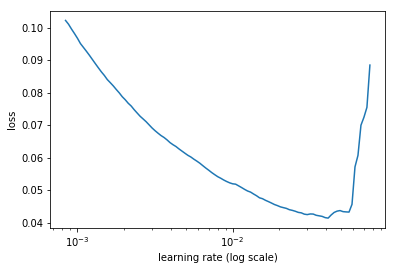

In [49]:
m.sched.plot(100)

Do some initial learning

In [50]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-2

In [51]:
m.fit(lr, 3, metrics=[exp_rmspe], cycle_len=3)

epoch      trn_loss   val_loss   exp_rmspe                      
    0      0.004754   0.477336   0.439029  
    1      0.001371   0.45082    0.426809                       
    2      0.000898   0.456365   0.428784                        
    3      0.002422   0.450999   0.423177                       
    4      0.000843   0.429291   0.415126                        
    5      0.000555   0.425552   0.413308                        
    6      0.001946   0.385789   0.395759                       
    7      0.000628   0.377484   0.391748                        
    8      0.000442   0.377617   0.392116                        



[array([0.37762]), 0.39211649950393845]

In [147]:
lrs = [lr/9,lr/6,lr/3]

In [148]:
m.fit(lrs, 3, metrics=[exp_rmspe], cycle_len=3)

epoch      trn_loss   val_loss   exp_rmspe                      
    0      0.032967   0.446795   50.002028 
    1      0.027396   0.438566   47.747239                      
    2      0.012495   0.434884   48.034277                     
    3      0.018571   0.43055    47.759327                      
    4      0.022893   0.430734   48.3176                        
    5      0.010911   0.433205   48.534001                      
    6      0.015179   0.446778   48.523526                      
    7      0.008747   0.436375   48.740152                      
    8      0.013039   0.430321   48.697722                      



[array([0.43032]), 48.69772198227157]